In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('../data/database.db')

In [3]:
df = pd.read_sql_query('SELECT * FROM loanDev JOIN (select account.id, district.id as districtId, districtName, region, nInhabitants, nMunicipalitiesSub499Inhabitants, nMunicipalities500to1999Inhabitants, nMunicipalities2000to9999Inhabitants, nMunicipalitiesOver10000Inhabitants, nCities, urbanInhabitantsRatio, averageSalary, unemploymentRate95, unemploymentRate96, nEnterpreneursPer1000Inhabitants, commitedCrimes95, commitedCrimes96 from account JOIN district where account.districtId = district.id) as A where loanDev.accountId = A.id;', con)
df.head()

,id,accountId,date,amount,duration,payments,status,id,districtId,districtName,...,nMunicipalities2000to9999Inhabitants,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate95,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes95,commitedCrimes96
0,5314,1787,930705,96396,12,8033,-1,1787,30,Sokolov,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,5316,1801,930711,165960,36,4610,1,1801,46,Nachod,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,6863,9188,930728,127080,60,2118,1,9188,45,Jicin,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,5325,1843,930803,105804,36,2939,1,1843,12,Pribram,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,7240,11013,930906,274740,60,4579,1,11013,1,Hl.m. Praha,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107


In [4]:
df.head()

,id,accountId,date,amount,duration,payments,status,id,districtId,districtName,...,nMunicipalities2000to9999Inhabitants,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate95,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes95,commitedCrimes96
0,5314,1787,930705,96396,12,8033,-1,1787,30,Sokolov,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,5316,1801,930711,165960,36,4610,1,1801,46,Nachod,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,6863,9188,930728,127080,60,2118,1,9188,45,Jicin,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,5325,1843,930803,105804,36,2939,1,1843,12,Pribram,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,7240,11013,930906,274740,60,4579,1,11013,1,Hl.m. Praha,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107


In [5]:
df.describe()

,id,accountId,amount,duration,payments,status,id,districtId,nInhabitants,nMunicipalitiesSub499Inhabitants,nMunicipalities500to1999Inhabitants,nMunicipalities2000to9999Inhabitants,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes96
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,6205.658537,5982.085366,145308.621951,35.853659,4150.932927,0.719512,5982.085366,36.960366,2.888467e+05,39.240854,21.698171,5.432927,1.649390,5.219512,68.649390,9593.338415,3.474451,122.759146,17974.329268
std,667.985675,3213.262492,105247.318098,16.734752,2193.620989,0.695541,3213.262492,25.242099,3.779662e+05,34.850137,16.369876,4.441438,1.070425,2.886325,20.573455,1359.232577,2.211972,23.951657,33065.392486
min,4959.000000,2.000000,4980.000000,12.000000,319.000000,-1.000000,2.000000,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.430000,81.000000,888.000000
25%,5604.250000,3079.000000,68328.000000,24.000000,2368.750000,1.000000,3079.000000,12.750000,9.208400e+04,5.000000,7.000000,2.000000,1.000000,4.000000,53.000000,8552.250000,1.860000,107.000000,2291.750000
50%,6227.500000,6032.000000,114804.000000,36.000000,3878.500000,1.000000,6032.000000,38.000000,1.252360e+05,34.000000,23.000000,5.000000,1.000000,5.000000,62.000000,9019.500000,3.490000,115.500000,3891.000000
75%,6737.250000,8564.500000,198600.000000,48.000000,5907.750000,1.000000,8564.500000,62.000000,2.268035e+05,63.000000,35.000000,8.000000,2.000000,7.000000,88.250000,9951.250000,4.790000,140.000000,9208.000000
max,7308.000000,11362.000000,538500.000000,60.000000,9689.000000,1.000000,11362.000000,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,9.400000,167.000000,99107.000000


<AxesSubplot:>

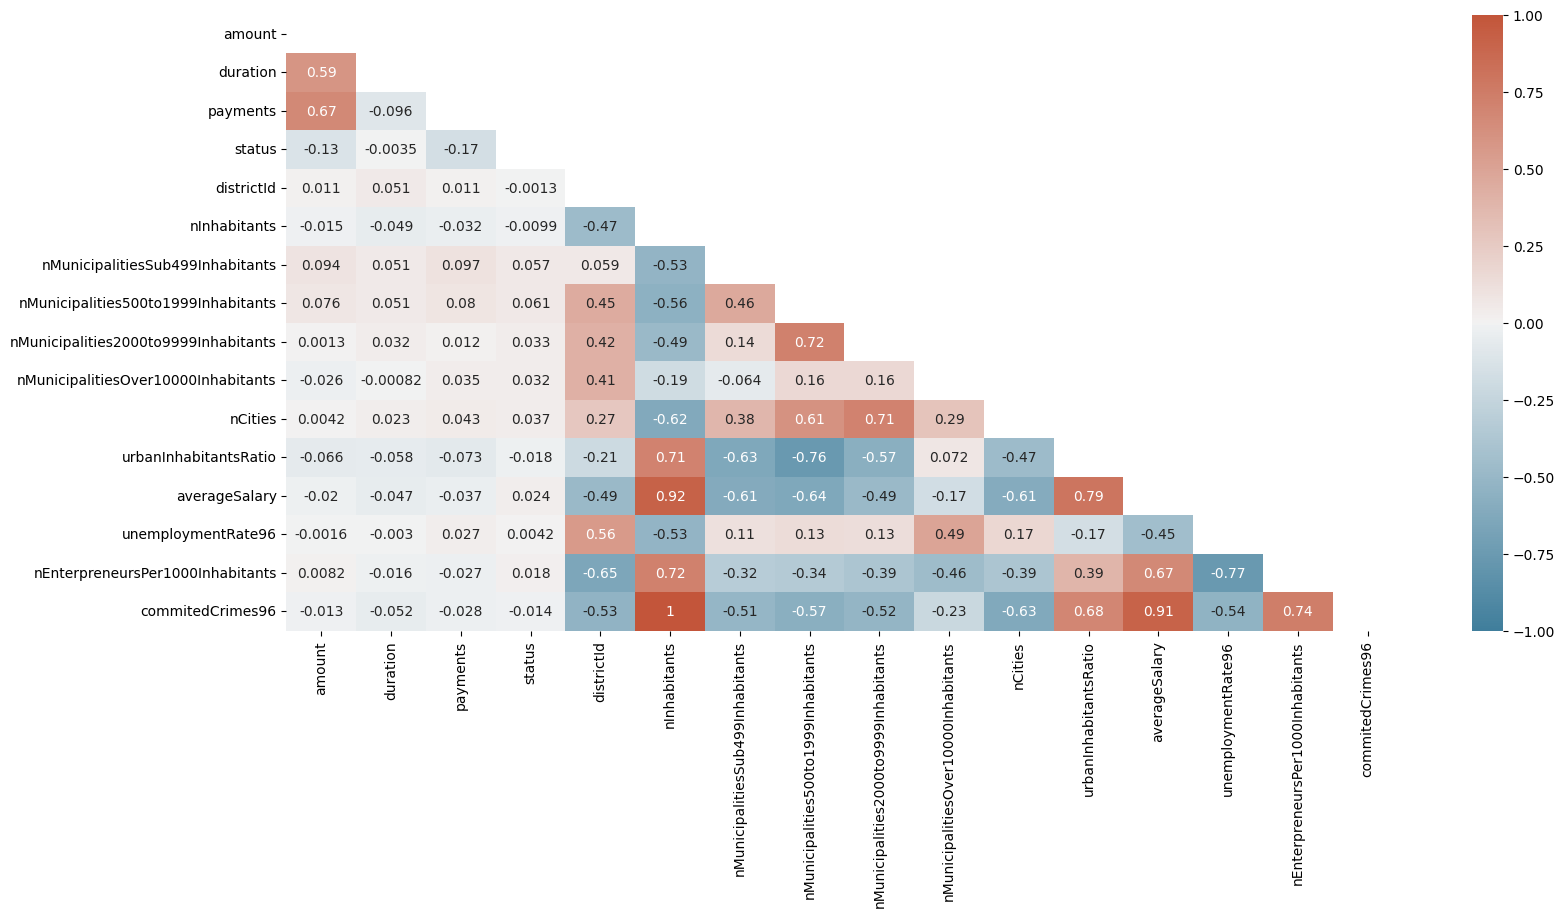

In [6]:
fig, ax1 = plt.subplots(figsize=(18,8))
corr = df.drop(['id', 'accountId'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmax=1, vmin=-1, annot=True, mask=mask, ax=ax1)

In [7]:
region_df = df.copy()
region_df['status'] = (region_df['status']+1)/2 # Transform status from -1/1 to 0/1 to improve plot
region_df = region_df.groupby('region') \
                         .agg(count=('region', 'count'), mean_status=('status', 'mean'), median_status=('status', 'median')) \
                         .reset_index()
region_df = region_df.sort_values(by=['count'], ascending=False).reset_index(drop=True)
region_df['mean_status_percent'] = region_df['mean_status']*100
region_df.head(20)

,region,count,mean_status,median_status,mean_status_percent
0,south Moravia,64,0.906250,1.0,90.625000
1,north Moravia,51,0.784314,1.0,78.431373
2,Prague,46,0.847826,1.0,84.782609
3,central Bohemia,40,0.900000,1.0,90.000000
4,east Bohemia,37,0.891892,1.0,89.189189
5,west Bohemia,31,0.774194,1.0,77.419355
6,south Bohemia,30,0.800000,1.0,80.000000
7,north Bohemia,29,0.965517,1.0,96.551724


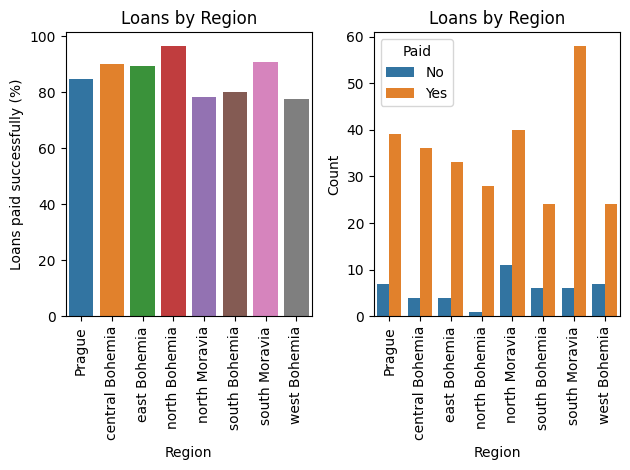

In [34]:
fig, ax = plt.subplots(1,2)

sns.barplot(data=region_df.sort_values(by='region'), x='region', y='mean_status_percent', ax=ax[0])
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Loans paid successfully (%)')
ax[0].set_title('Loans by Region')
ax[0].xaxis.set_tick_params(rotation=90)

sns.countplot(data=df.sort_values(by='region'), x='region', hue='status', ax=ax[1])
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Count')
ax[1].set_title('Loans by Region')
ax[1].xaxis.set_tick_params(rotation=90)
ax[1].legend(['No', 'Yes'], title='Paid')

plt.tight_layout()

<AxesSubplot:xlabel='districtName', ylabel='count'>

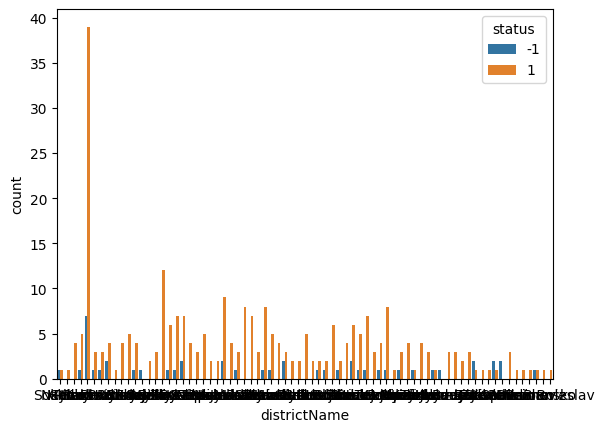

In [35]:
sns.countplot(df, x='districtName', hue='status')

In [36]:
district_df = df.copy()
district_df['status'] = (district_df['status']+1)/2 # Transform status from -1/1 to 0/1 to improve plot
district_df = district_df.groupby('districtName') \
                         .agg(count=('districtName', 'count'), mean_status=('status', 'mean'), median_status=('status', 'median')) \
                         .reset_index()
district_df = district_df.sort_values(by=['count'], ascending=False).reset_index(drop=True)
district_df['mean_status_percent'] = district_df['mean_status']*100
district_df.head()

,districtName,count,mean_status,median_status,mean_status_percent
0,Hl.m. Praha,46,0.847826,1.0,84.782609
1,Zlin,12,1.000000,1.0,100.000000
2,Ostrava - mesto,11,0.818182,1.0,81.818182
3,Brno - mesto,9,0.777778,1.0,77.777778
4,Olomouc,9,0.888889,1.0,88.888889


In [37]:
district_df.describe()

,count,mean_status,median_status,mean_status_percent
count,73.000000,73.000000,73.000000,73.000000
mean,4.493151,0.844001,0.904110,84.400054
std,5.543072,0.246492,0.272049,24.649200
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.750000,1.000000,75.000000
50%,3.000000,1.000000,1.000000,100.000000
75%,5.000000,1.000000,1.000000,100.000000
max,46.000000,1.000000,1.000000,100.000000


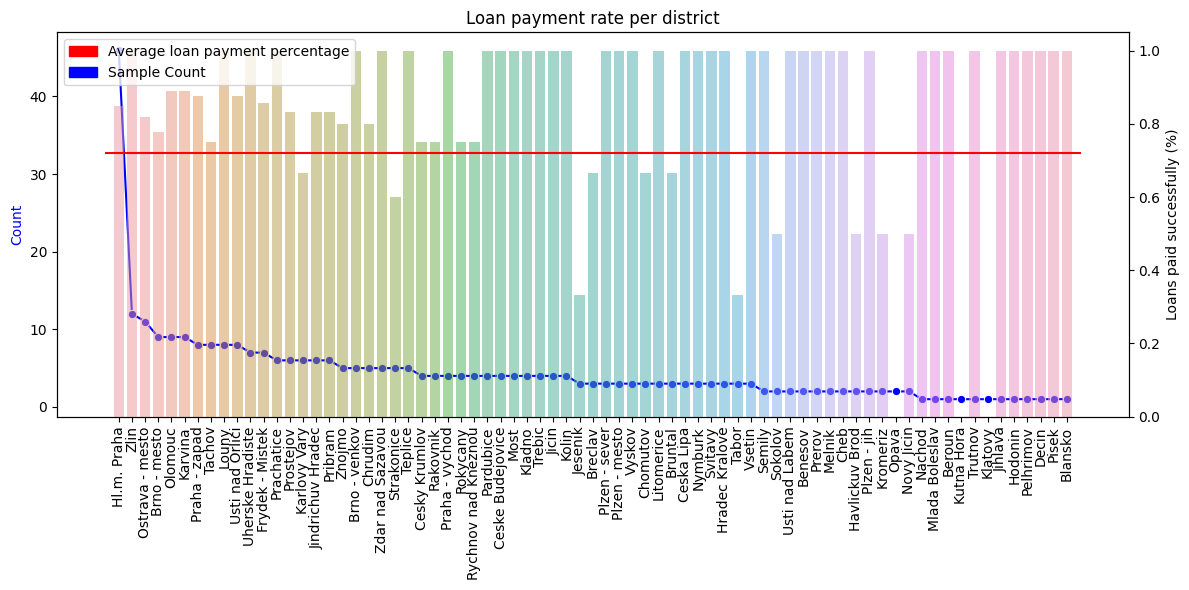

In [48]:
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=district_df['count'], marker='o', sort = False, ax=ax1, color='b')
ax2 = ax1.twinx()

plot = sns.barplot(y='mean_status', x='districtName', data=district_df, alpha=0.5, ax=ax2)
plt.setp(ax1.get_xticklabels(), rotation=90)

plt.plot([-1,73],[0.719512, 0.719512], color='r')

red_patch = mpatches.Patch(color='red', label='Average loan payment percentage')
blue_patch = mpatches.Patch(color='blue', label='Sample Count')
plt.legend(handles=[red_patch, blue_patch])

ax1.set_ylabel('Count', color='b')
ax2.set_ylabel('Loans paid successfully (%)')

plt.title('Loan payment rate per district')

print()
plt.tight_layout()